<a href="https://colab.research.google.com/github/bhattronak1/ML-Tensorflow-project/blob/main/MINIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn
assert sklearn.__version__>='0.20'
import numpy as np
import os
#To plot figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#where to save figures
PROJECT_ROOT_DIR='.'
CHAPTER_ID = 'end_to_end_project'
IMAGE_PATH = os.path.join(PROJECT_ROOT_DIR, 'images', CHAPTER_ID)
os.makedirs(IMAGE_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
  path=os.path.join(IMAGE_PATH, fig_id + '.'+ fig_extension)
  print('Saving figure', fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format='png', dpi=300)


# Ignore useless warning
import warnings
warnings.filterwarnings(action='ignore', message='^internal gelsd')

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [3]:
X,y = mnist['data'], mnist['target']
print(X.shape)
print(y.shape)
y=y.astype(np.uint8)

(70000, 784)
(70000,)


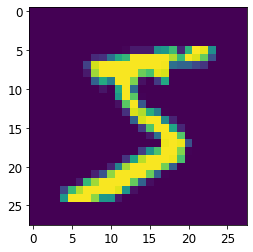

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

a = X[0]
a_image=a.reshape(28,28)

plt.imshow(a_image)
plt.show()


In [5]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [6]:
shuffle_index = np.random.permutation(len(X_train))
X_train, y_train = X_train[shuffle_index], y[shuffle_index]

In [7]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [8]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3,random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [9]:
sgd_clf.predict([a])

array([ True])

In [10]:
from sklearn.model_selection import cross_val_score
sgd_clf_cv = cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

In [11]:
sgd_clf_cv

array([0.96405, 0.95405, 0.96725])

In [12]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
sgd_clf_cv_predict = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
confusion_matrix(y_train_5,sgd_clf_cv_predict)


array([[53325,  1254],
       [ 1039,  4382]])

In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score
sgd_clf_cv_precision= precision_score(y_train_5, sgd_clf_cv_predict)
sgd_clf_cv_recall = recall_score(y_train_5, sgd_clf_cv_predict)
sgd_clf_cv_f1_score = f1_score(y_train_5, sgd_clf_cv_predict)

In [14]:
print('Precision:',sgd_clf_cv_precision)
print('Recall:',sgd_clf_cv_recall)
print('F1-Score:',sgd_clf_cv_f1_score)

Precision: 0.7775017743080199
Recall: 0.8083379450285925
F1-Score: 0.7926200596906936


In [15]:
y_score= cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

In [16]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_score)


In [17]:
def plot_precision_recall_vs_threshold(presisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1],'b', label='Precisions')
  plt.plot(thresholds, recalls[:-1],'r', label='Recall')
  plt.xlabel('Threshold')
  plt.legend(loc='upper left')
  plt.ylim=([0,1])

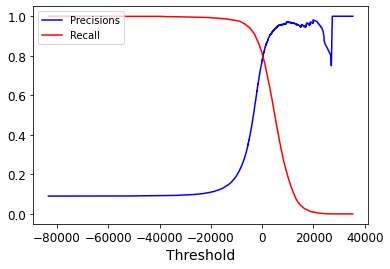

In [18]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [19]:
def plot_precision_vs_recalls(presisions, recalls):
  plt.plot(recalls, precisions,'b-', linewidth=2)
  plt.xlabel('Recall')
  plt.ylabel('precision')
  plt.axis([0,1,0,1])
  plt.legend(loc='upper left')
  plt.ylim=([0,1])

No handles with labels found to put in legend.


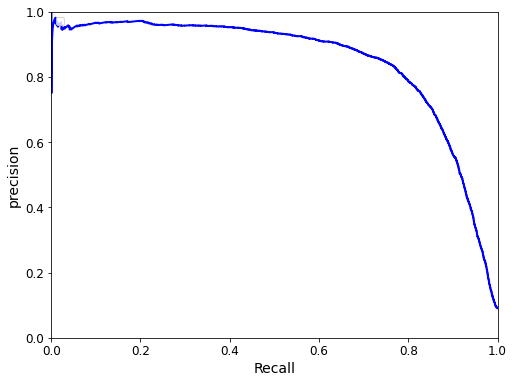

In [20]:
plt.figure(figsize=(8,6))
plot_precision_vs_recalls(precisions, recalls)
plt.show()

In [21]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [22]:
threshold_90_precision

2906.3612894700505

In [23]:
y_train_90 = (y_score >= threshold_90_precision)

In [24]:
precision_score(y_train_5, y_train_90)

0.9001544004117344

In [25]:
recall_score(y_train_5, y_train_90)

0.6452684006640841

In [26]:
sgd_clf.fit(X_train, y_train)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [27]:
sgd_clf.predict([a])

array([5], dtype=uint8)

In [28]:
from sklearn.multiclass import OneVsRestClassifier


In [29]:
ovr_clf= OneVsRestClassifier(SGDClassifier(random_state=42))

In [30]:
ovr_clf.fit(X_train[:1000],y_train[:1000])

OneVsRestClassifier(estimator=SGDClassifier(alpha=0.0001, average=False,
                                            class_weight=None,
                                            early_stopping=False, epsilon=0.1,
                                            eta0=0.0, fit_intercept=True,
                                            l1_ratio=0.15,
                                            learning_rate='optimal',
                                            loss='hinge', max_iter=1000,
                                            n_iter_no_change=5, n_jobs=None,
                                            penalty='l2', power_t=0.5,
                                            random_state=42, shuffle=True,
                                            tol=0.001, validation_fraction=0.1,
                                            verbose=0, warm_start=False),
                    n_jobs=None)

In [31]:
ovr_clf.predict([a])

array([5], dtype=uint8)

In [32]:
from sklearn.ensemble import RandomForestClassifier
rand_clf= RandomForestClassifier(random_state=42)
rand_clf.fit(X_train[:1000],y_train[:1000])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [33]:
rand_clf.predict([a])

array([5], dtype=uint8)

In [34]:
y_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

In [35]:
conf_mtrx = confusion_matrix(y_train, y_pred)

In [36]:
conf_mtrx

array([[5461,    1,  121,   32,    4,  112,   80,   10,   77,   25],
       [   1, 6520,   41,   19,    5,   31,    9,   12,   90,   14],
       [  24,   79, 5310,  116,   41,   53,   75,   65,  172,   23],
       [  20,   45,  256, 5252,    7,  235,   17,   52,  163,   84],
       [  10,   34,  106,   30, 5052,   51,   68,   29,  109,  353],
       [  40,   25,   73,  274,   41, 4566,  116,   25,  186,   75],
       [  18,   27,   97,    6,   28,  132, 5532,    8,   64,    6],
       [  12,   28,  112,   41,   50,   25,   10, 5681,   42,  264],
       [  23,  142,  173,  179,   21,  436,   44,   26, 4665,  142],
       [  13,   23,   91,  141,  116,  124,    4,  216,  146, 5075]])

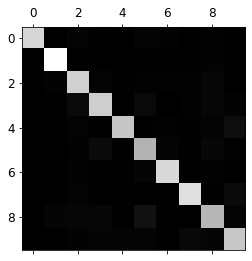

In [37]:
plt.matshow(conf_mtrx, cmap=plt.cm.gray)

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

para_grid= [
            {'weights':['uniform','distance']},
            {'n_neighbors':[2,3,4]}
]


In [39]:
knn_clf = KNeighborsClassifier()

In [ ]:
grid_search = GridSearchCV(knn_clf, para_grid, cv=3, scoring='accuracy', verbose = 3 )
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] weights=uniform .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
